### Task1.2 - 构建集成模型

构建随机森林、GBDT、XGBoost和LightGBM这4个模型，并对每一个模型进行评分，评分方式任意，例如准确度和auc值。

[文档地址](https://shimo.im/docs/jse5ZZhdvEQR4siC)

In [1]:
#引入包
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import metrics
import time

In [2]:
data = pd.read_csv('data_all.csv')
data.head()
#data.info()

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regional_mobility,...,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,reg_preference_for_trad,latest_query_time_month,latest_query_time_weekday,loans_latest_time_month,loans_latest_time_weekday
0,0.01,0.99,0,0.90,0.55,0.313,17.0,27.0,26.0,3.0,...,2.0,1200.0,1200.0,12.0,18.0,0,4.0,2.0,4.0,3.0
1,0.02,0.94,2000,1.28,1.00,0.458,19.0,30.0,14.0,4.0,...,6.0,22800.0,9360.0,4.0,2.0,0,5.0,3.0,5.0,5.0
2,0.04,0.96,0,1.00,1.00,0.114,13.0,68.0,22.0,1.0,...,1.0,4200.0,4200.0,2.0,6.0,0,5.0,5.0,5.0,1.0
3,0.00,0.96,2000,0.13,0.57,0.777,22.0,14.0,6.0,3.0,...,5.0,30000.0,12180.0,2.0,4.0,1,5.0,5.0,5.0,3.0
4,0.01,0.99,0,0.46,1.00,0.175,13.0,66.0,42.0,1.0,...,2.0,8400.0,8250.0,22.0,120.0,0,4.0,6.0,1.0,6.0


In [3]:
# 拆分训练集和测试集
y = data['status']
X = data.drop(['status'],axis=1)
y.value_counts()
print('The shape of X is: ',X.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.3, random_state=2018)
y_train.value_counts()
y_test.value_counts()

0    3561
1    1193
Name: status, dtype: int64

('The shape of X is: ', (4754, 84))


0    2493
1     834
Name: status, dtype: int64

0    1068
1     359
Name: status, dtype: int64

In [4]:
rf_model = RandomForestClassifier(n_estimators='warn', criterion='gini', max_depth=None, 
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, 
                                  random_state=2018, verbose=0, warm_start=False, class_weight=None)
gbdt_model = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, 
                                        subsample=1.0, criterion='friedman_mse', min_samples_split=2, 
                                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                                        min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
                                        random_state=2018, max_features=None, verbose=0, max_leaf_nodes=None, 
                                        warm_start=False, presort='auto', validation_fraction=0.1, 
                                        n_iter_no_change=None, tol=0.0001)
xgb_model = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
                          objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, 
                          min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, 
                          colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, 
                          random_state=2018, seed=None, missing=None)
lgbm_model = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, 
                            n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, 
                            min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, 
                            subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, 
                            random_state=2018, n_jobs=-1, silent=True, importance_type='split')

In [5]:
models = {'RF':rf_model,
         'GBDT':gbdt_model,
         'XGB':xgb_model,
         'LightGBM':lgbm_model}

def evaluate(y,y_hat,y_proba):
    acc = metrics.accuracy_score(y,y_hat)
    p = metrics.precision_score(y,y_hat)
    r = metrics.recall_score(y,y_hat)
    f1 = metrics.f1_score(y,y_hat,average='weighted')
    fpr,tpr,thresholds = metrics.roc_curve(y,y_proba[:,1])
    auc = metrics.auc(fpr,tpr)
    #auc = metrics.roc_auc_score(y,y_hat)
    return acc, p, r, f1, fpr, tpr, auc

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=2018, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Model        LightGBM
Accuracy     0.770147
Precision    0.570136
Recall       0.350975
F1 score     0.749777
AUC          0.757402
Time          2.09111
Name: 0, dtype: object


/usr/local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

Model              RF
Accuracy     0.769446
Precision     0.59375
Recall       0.264624
F1 score      0.73507
AUC          0.720288
Time         0.378502
Name: 1, dtype: object


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=2018,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Model            GBDT
Accuracy     0.780659
Precision     0.61165
Recall       0.350975
F1 score     0.758291
AUC          0.763828
Time          2.37766
Name: 2, dtype: object


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=2018, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

Model             XGB
Accuracy     0.785564
Precision    0.630542
Recall       0.356546
F1 score       0.7631
AUC          0.771363
Time          1.34508
Name: 3, dtype: object


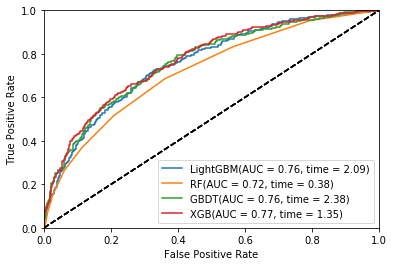

In [6]:
df_result = pd.DataFrame(columns=('Model', 'Accuracy', 'Precision', 'Recall', 'F1 score', 'AUC', 'Time'))
row = 0
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)
    end = time.time()

    acc,p,r,f1,fpr,tpr,auc = evaluate(y_test,y_test_pred,y_test_proba)
    
    plot_roc_curve(fpr,tpr,label=name+'(AUC = %.2f, time = %.2f)' %(auc,end-start))

    df_result.loc[row] = [name, acc, p, r, f1, auc, end-start]
    print(df_result.loc[row])
    row += 1
plt.show()

In [7]:
df_result

,Model,Accuracy,Precision,Recall,F1 score,AUC,Time
0,LightGBM,0.770147,0.570136,0.350975,0.749777,0.757402,2.091114
1,RF,0.769446,0.593750,0.264624,0.735070,0.720288,0.378502
2,GBDT,0.780659,0.611650,0.350975,0.758291,0.763828,2.377662
3,XGB,0.785564,0.630542,0.356546,0.763100,0.771363,1.345076
